In [1]:
!ls

hmeq.csv
In the past.docx
Titanic_1.PNG
Titanic_2.PNG
Untitled.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('hmeq.csv')

In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [13]:
print('% of NAs in each column','\n', np.sum(df.isna())/len(df))

% of NAs in each column 
 BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64


(array([4771.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1189.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

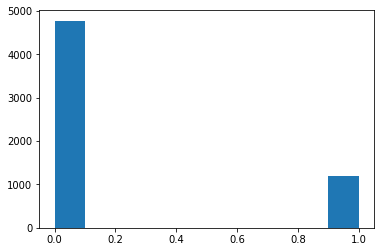

In [14]:
plt.hist(df.BAD,)

In [18]:
df.REASON.value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [24]:
df.REASON.fillna(df.REASON.mode()[0], inplace=True) #Impute missing with mode

In [26]:
df.REASON.isna().sum() #Check NAs of df['REASON']

0

In [28]:
df.JOB.value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [30]:
df['JOB'] = df.JOB.astype('category')
df.JOB.cat.categories
df.JOB = df.JOB.cat.codes+1

In [54]:
print('% of NAs in each column','\n', np.sum(df.isna())/len(df))

% of NAs in each column 
 BAD        0.000000
LOAN       0.000000
MORTDUE    0.000000
VALUE      0.018792
REASON     0.000000
JOB        0.000000
YOJ        0.086409
DEROG      0.000000
DELINQ     0.000000
CLAGE      0.051678
NINQ       0.000000
CLNO       0.037248
DEBTINC    0.212584
dtype: float64


In [41]:
df.DEROG = df.DEROG.astype('category')
df.DEROG = df.DEROG.cat.codes+1
df.DEROG[df.DEROG >=3] = 3

In [45]:
df.DELINQ = df.DELINQ.astype('category')
df.DELINQ = df.DELINQ.cat.codes+1

In [46]:
df.NINQ = df.NINQ.astype('category')
df.NINQ = df.NINQ.cat.codes+1

(array([1130., 2455., 1584.,  419.,  184.,  114.,   18.,   26.,   13.,
          17.]),
 array([ 1100.,  9980., 18860., 27740., 36620., 45500., 54380., 63260.,
        72140., 81020., 89900.]),
 <a list of 10 Patch objects>)

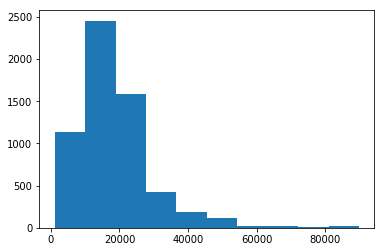

In [48]:
plt.hist(df.LOAN, bins=10)

In [53]:
df.MORTDUE.fillna(df.MORTDUE.median(), inplace=True)

(array([3.141e+03, 2.155e+03, 4.400e+02, 9.400e+01, 2.000e+00, 1.200e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([  8000. ,  92790.9, 177581.8, 262372.7, 347163.6, 431954.5,
        516745.4, 601536.3, 686327.2, 771118.1, 855909. ]),
 <a list of 10 Patch objects>)

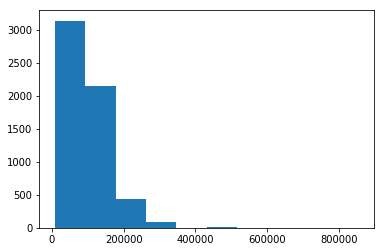

In [56]:
plt.hist(df.VALUE[df.VALUE.isna()==0])

In [70]:
a = df.VALUE[df.VALUE.isna()==0]
df.VALUE.fillna(a.median(), inplace=True)

In [72]:
IQR = np.percentile(df.VALUE, 75) - np.percentile(df.VALUE, 25)

In [73]:
Out_value = df.VALUE.copy()

In [61]:
b = np.percentile(a, 75)+3*IQR

In [79]:
b

281070.5

In [85]:
df.YOJ.value_counts()

0.00     415
1.00     363
2.00     347
5.00     333
4.00     324
6.00     318
3.00     307
9.00     286
10.00    285
8.00     256
7.00     244
11.00    177
13.00    162
12.00    149
15.00    135
14.00    134
16.00    121
19.00     91
18.00     83
20.00     82
17.00     78
23.00     77
24.00     75
21.00     69
22.00     67
25.00     56
26.00     48
27.00     37
28.00     35
30.00     30
        ... 
1.30       2
9.20       1
1.40       1
8.30       1
22.80      1
17.60      1
12.90      1
24.50      1
4.30       1
32.00      1
7.20       1
8.80       1
8.90       1
2.20       1
1.70       1
5.30       1
3.20       1
14.40      1
7.40       1
3.90       1
13.50      1
29.90      1
28.50      1
19.50      1
9.30       1
4.60       1
17.80      1
0.25       1
5.60       1
6.60       1
Name: YOJ, Length: 99, dtype: int64